In [930]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [931]:
power_plant=pd.read_csv('global_power_plant.csv',sep='\t')
power_plant

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [932]:
df=pd.DataFrame(power_plant)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [933]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [934]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Dropping the columns: other_fuel1,other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh as they have more than 80% data missing and are of object dtype.

In [935]:
list=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh' ]
for i in list:
    df.drop(i,axis=1,inplace=True)
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [936]:
#separating object and float data types
float_col=[]
object_col=[]
for i in df.columns:
    if(df[i].dtypes=='float64'):
        float_col.append(i)
    if(df[i].dtypes=='object'):
        object_col.append(i)
print(float_col)
print(object_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [937]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [938]:
#getting the percentage of missing data in float columns
for i in float_col:
    null=df[i].isnull().sum()
    percent=(null/908)*100
    print(i,percent,"%")

capacity_mw 0.0 %
latitude 5.066079295154185 %
longitude 5.066079295154185 %
commissioning_year 41.85022026431718 %
year_of_capacity_data 42.731277533039645 %
generation_gwh_2013 57.70925110132159 %
generation_gwh_2014 55.837004405286336 %
generation_gwh_2015 53.19383259911894 %
generation_gwh_2016 51.87224669603524 %
generation_gwh_2017 51.2114537444934 %


<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

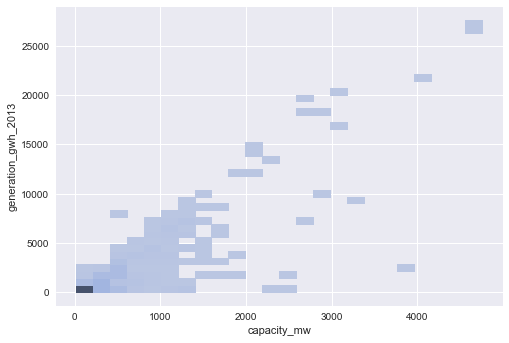

In [939]:
x=df['capacity_mw']
y=df['generation_gwh_2013']
sns.histplot(data=df,x='capacity_mw',y='generation_gwh_2013')

<AxesSubplot:xlabel='generation_gwh_2013'>

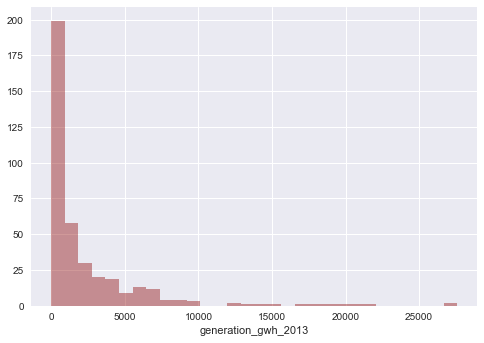

In [940]:
sns.distplot(df['generation_gwh_2013'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

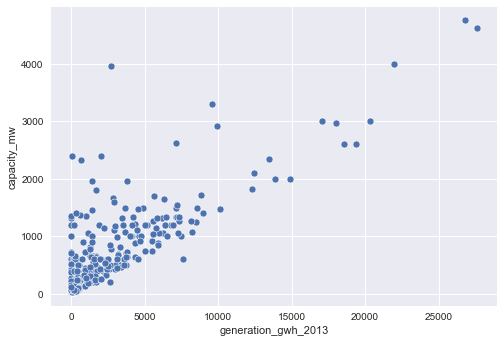

In [941]:
sns.scatterplot(y,x)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

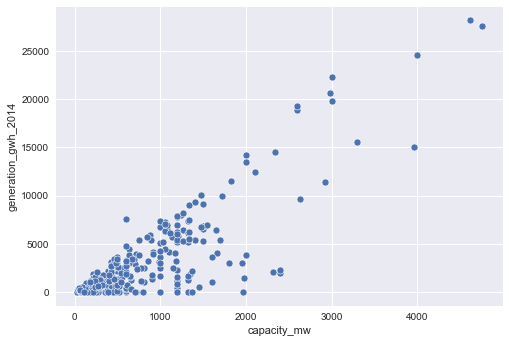

In [942]:
x=df['capacity_mw']
y=df['generation_gwh_2014']
sns.scatterplot(x,y)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

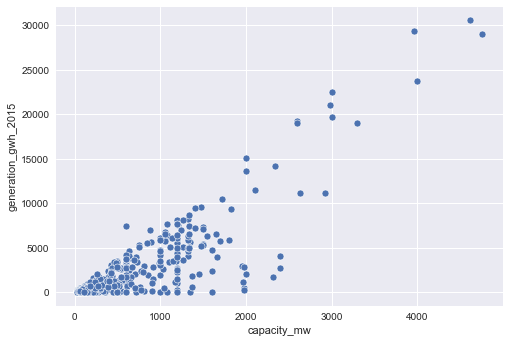

In [943]:
x=df['capacity_mw']
y=df['generation_gwh_2015']
sns.scatterplot(x,y)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

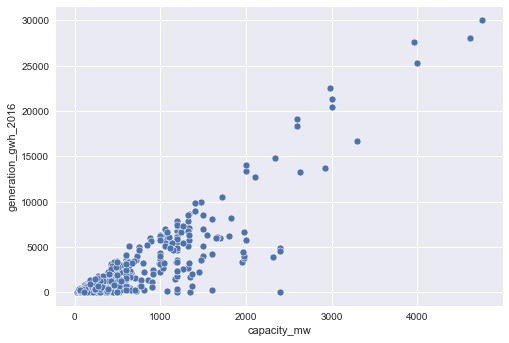

In [944]:
x=df['capacity_mw']
y=df['generation_gwh_2016']
sns.scatterplot(x,y)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

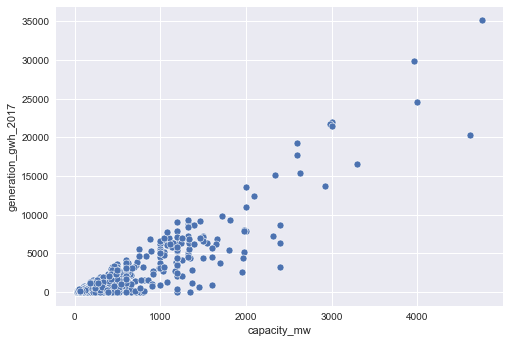

In [945]:
x=df['capacity_mw']
y=df['generation_gwh_2017']
sns.scatterplot(x,y)

In [946]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

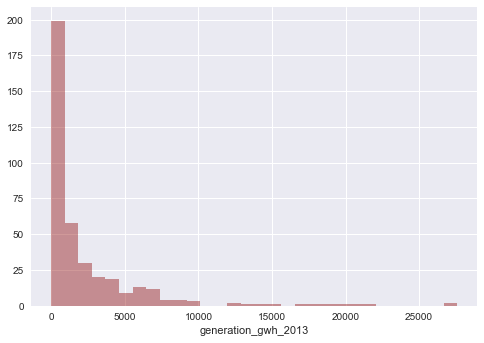

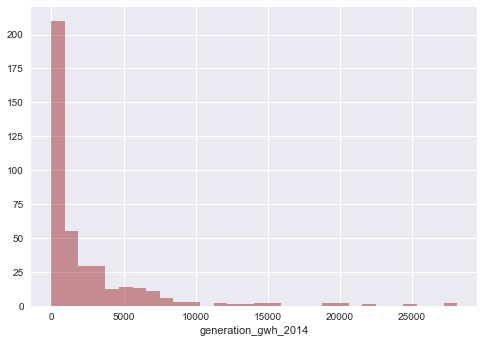

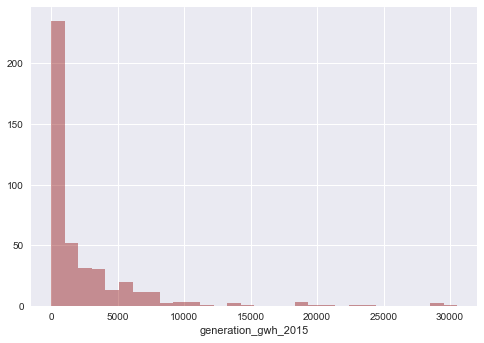

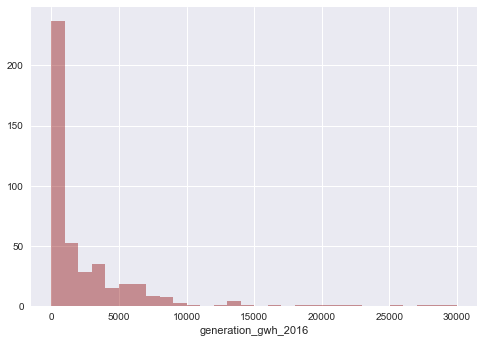

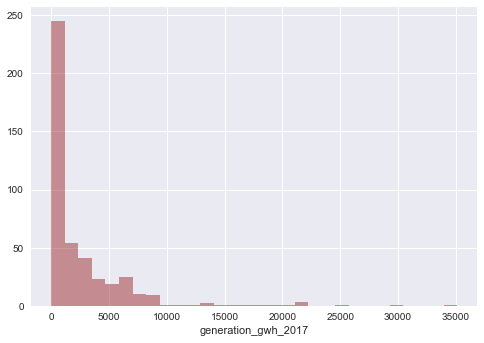

In [947]:
list=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for i in list:
    sns.distplot(df[i].dropna(),kde=False,color='darkred',bins=30)
    plt.show()

replacing the missing values by the mean of the respective columns


In [948]:
from sklearn.impute import SimpleImputer

In [949]:
for i in list:
    
    imp=SimpleImputer(missing_values=np.nan,strategy='mean')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [950]:
df[float_col[2]].nunique()

828

In [951]:
df[float_col].isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013        0
generation_gwh_2014        0
generation_gwh_2015        0
generation_gwh_2016        0
generation_gwh_2017        0
dtype: int64

In [952]:
df[float_col].head()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,NaN,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,NaN,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


<AxesSubplot:xlabel='year_of_capacity_data', ylabel='commissioning_year'>

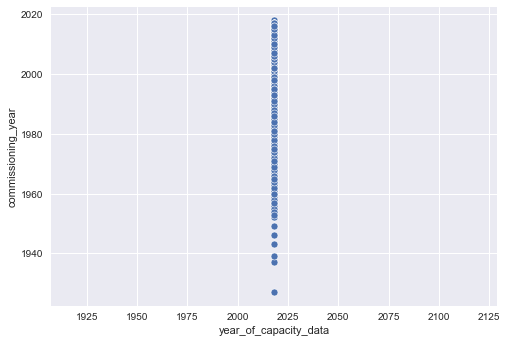

In [953]:
x=df['commissioning_year']
y=df['year_of_capacity_data']
sns.scatterplot(y,x)

MERGING THE CAPACITY AND THE YEAR OF CAPACITY COLUMN INTO A NEW COLUMN WHICH WILL GIVE THE NUMBER OF YEARS OF OPERATIONS.

In [954]:
df['year_of_capacity_data'].nunique()

1

In [955]:
#first imputing the missing values by the most frequent occurence
list2=['year_of_capacity_data','commissioning_year']
for i in list2:
    

    imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
df.isnull().sum()


country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [956]:
df[float_col].isnull().sum()

capacity_mw               0
latitude                 46
longitude                46
commissioning_year        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
dtype: int64

In [957]:
df['Years_of_Operation']=df['year_of_capacity_data']-df['commissioning_year']
df['Years_of_Operation'].head()

0     7.0
1     5.0
2     5.0
3    14.0
4     3.0
Name: Years_of_Operation, dtype: float64

In [958]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Years_of_Operation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,7.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,...,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,5.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,5.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,...,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,14.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,...,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,3.0


In [959]:
#dropping the initial columns from which the years of capacity column was created
df.drop(list2[0],axis=1,inplace=True)
df.drop(list2[1],axis=1,inplace=True)


In [960]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source', 'Years_of_Operation'],
      dtype='object')

In [961]:
#imputing the lattitude and the longitude information
list3=['latitude','longitude']
for i in list3:
    
    

    imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
df.isnull().sum()


country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
owner                     566
source                      0
url                         0
geolocation_source         19
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
Years_of_Operation          0
dtype: int64

In [962]:
float_col.pop(3)


'commissioning_year'

In [963]:
float_col.pop(3)

'year_of_capacity_data'

In [964]:
float_col.append("Years_of_Operation")

EDA OF THE CONTINOUS DATA

In [965]:
df[float_col].describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Years_of_Operation
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.084948,77.156237,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,14.375551
std,580.221767,6.107146,4.945215,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,15.238021
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,1332.538825,1175.264825,874.205000,826.629750,852.438887,5.000000
50%,60.000000,21.278850,76.492900,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.000000
75%,388.125000,25.183775,79.211600,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


capacity_mw


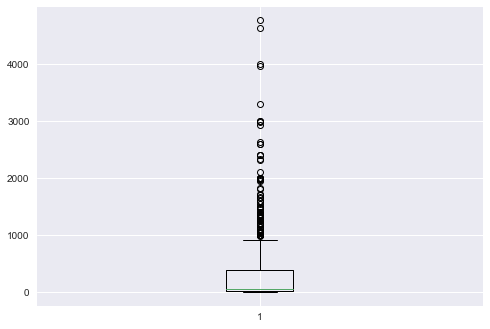

latitude


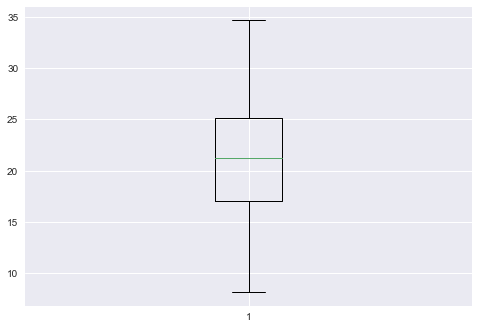

longitude


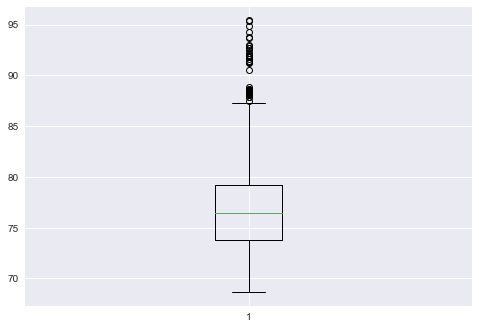

generation_gwh_2013


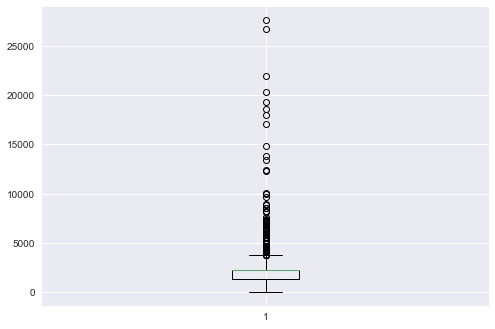

generation_gwh_2014


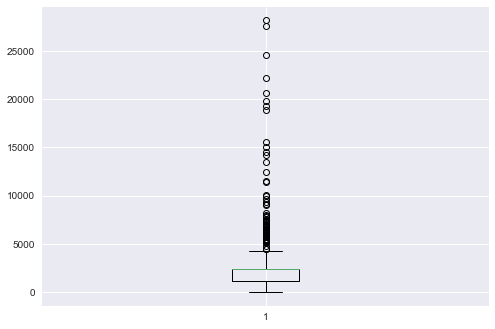

generation_gwh_2015


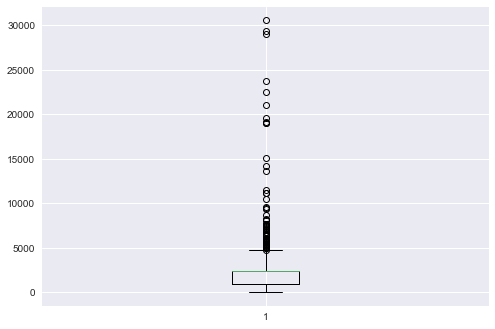

generation_gwh_2016


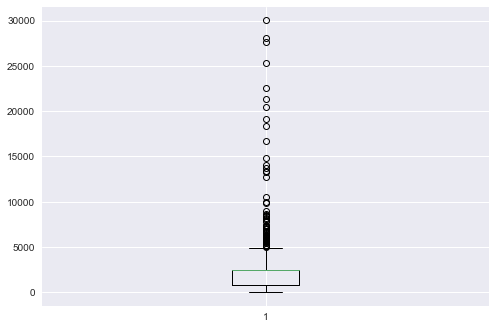

generation_gwh_2017


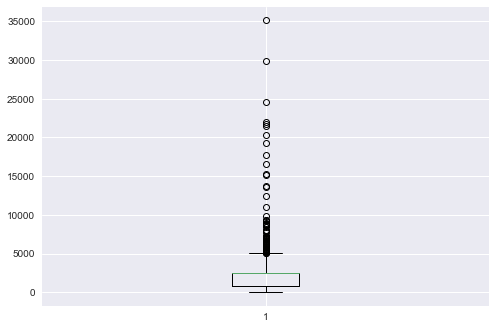

Years_of_Operation


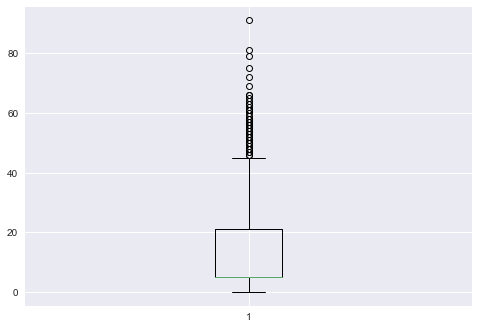

In [966]:
#checking for outliers
for i in float_col:
    print(i)
    plt.boxplot(df[i])
    plt.show()

Not removing outliers as the max data is rare but not incorrect.

In [967]:
df[float_col].skew()

capacity_mw            3.193257
latitude              -0.093609
longitude              1.118449
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
Years_of_Operation     1.779021
dtype: float64

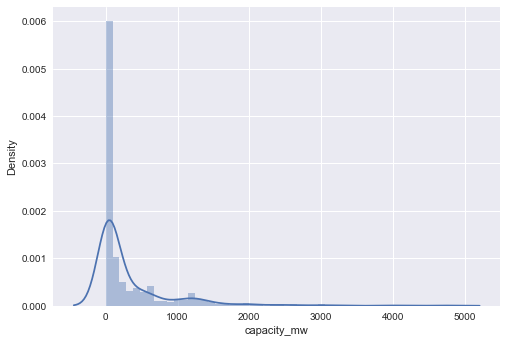

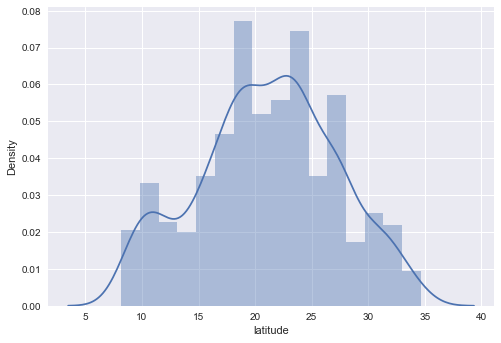

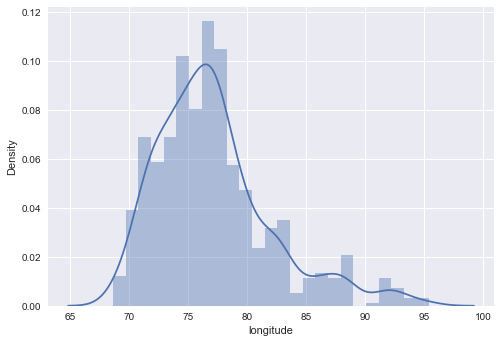

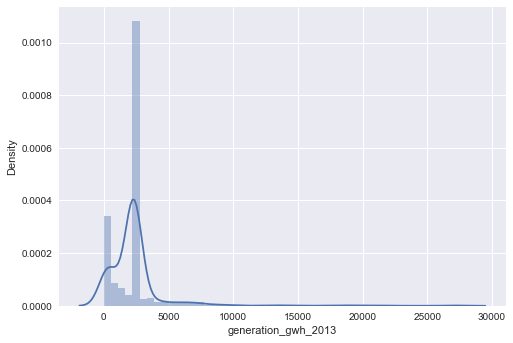

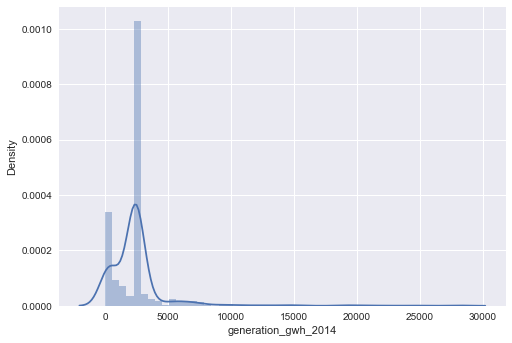

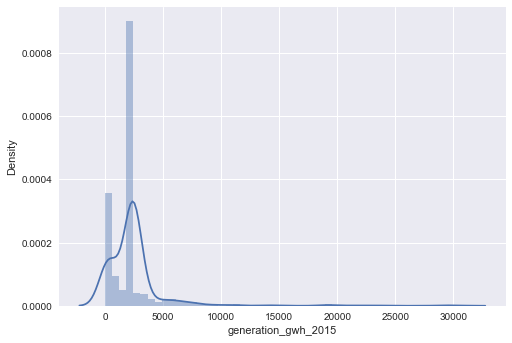

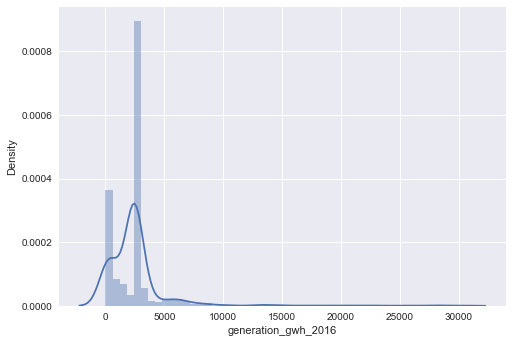

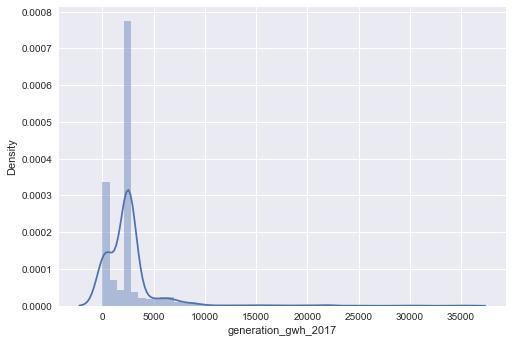

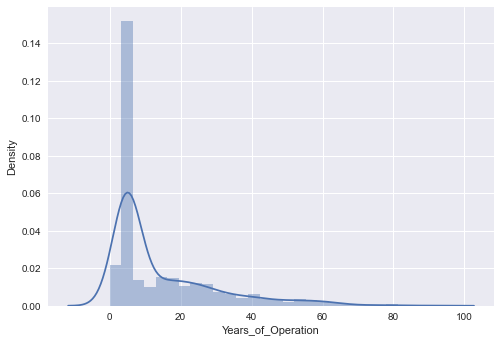

In [968]:
for i in df[float_col]:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [969]:
#from scipy.stats import boxcox
#list=['']

<AxesSubplot:>

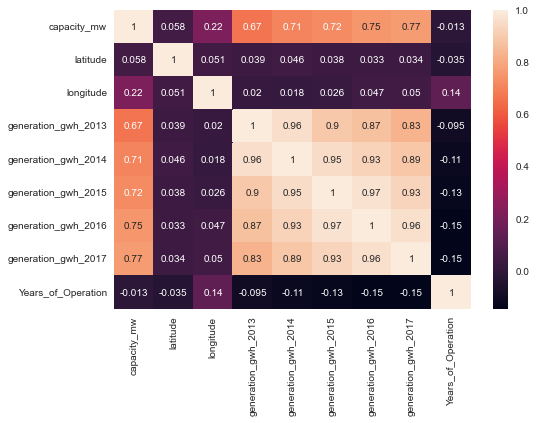

In [970]:
sns.heatmap(df[float_col].corr(),annot=True)

The generation gwh columns for the years-2013,2014,2015,2016,2017 show high collinearity amongst themselves and the target variable (capacity_mw).So it can be a good approach to covert them to a single column.

In [971]:
list4=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
df['average_production_2013-2017']=(df['generation_gwh_2013']+df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017'])/5

In [972]:
float_col.append('average_production_2013-2017')

In [973]:
df[float_col].head()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Years_of_Operation,average_production_2013-2017
0,2.5,28.1839,73.2407,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.0,2424.843128
1,98.0,24.7663,74.6090,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0,2424.843128
2,39.2,21.9038,69.3732,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0,2424.843128
3,135.0,23.8712,91.3602,631.777928,617.789264,843.747000,886.004428,663.774500,14.0,728.618624
4,1800.0,21.9603,82.4091,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0,4449.757947


In [974]:
#dropping the original columns

for i in list4:

    df.drop(i,axis=1,inplace=True)
    
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_data_source,Years_of_Operation,average_production_2013-2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,7.0,2424.843128
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,5.0,2424.843128
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,5.0,2424.843128
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority,14.0,728.618624
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority,3.0,4449.757947


In [975]:

float_col.pop(3)

'generation_gwh_2013'

In [976]:
float_col.pop(3)

'generation_gwh_2014'

In [977]:
float_col.pop(3)

'generation_gwh_2015'

In [978]:
float_col.pop(3)

'generation_gwh_2016'

In [979]:
float_col.pop(3)

'generation_gwh_2017'

<AxesSubplot:>

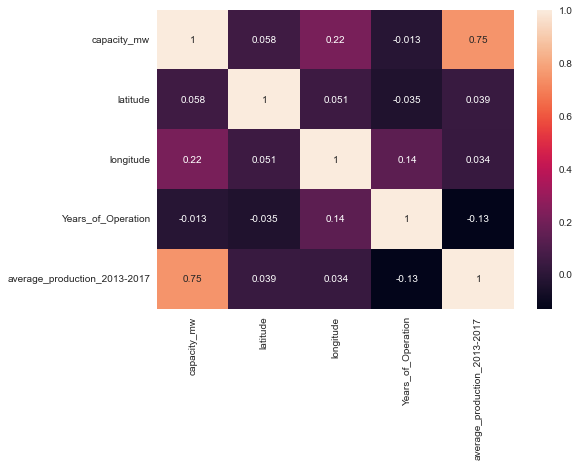

In [980]:
sns.heatmap(df[float_col].corr(),annot=True)

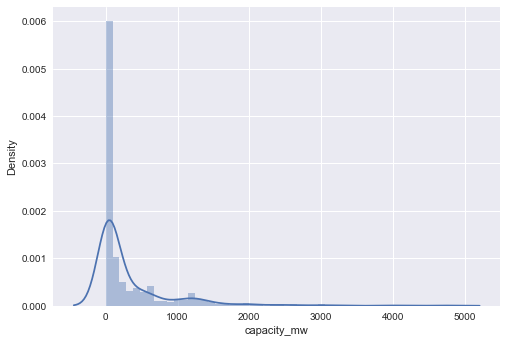

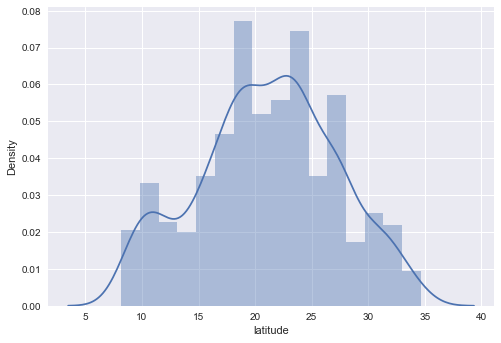

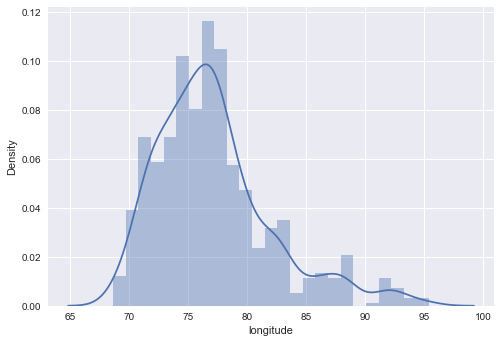

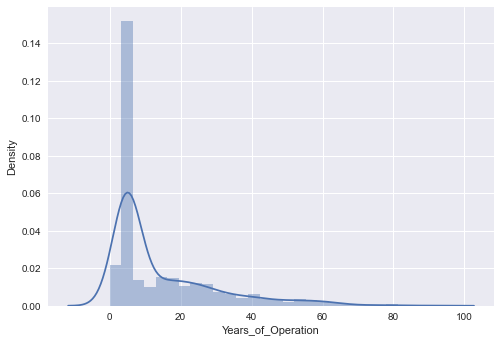

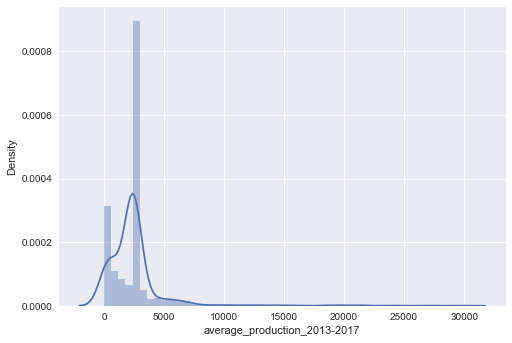

In [981]:
for i in df[float_col]:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [982]:
df[float_col].skew()

capacity_mw                     3.193257
latitude                       -0.093609
longitude                       1.118449
Years_of_Operation              1.779021
average_production_2013-2017    5.242037
dtype: float64

NOT REMOVING THE SKEWNESS FROM THE average_production_2013_2017 AS IT HAS A STRONG POSITIVE RELATIONSHIP WITH THE TARGET COLUMN AND REMOVING THE SKEWNESS MAY IMPACT THE COLLINEARITY.

In [983]:

#df['average_production_2013-2017']=np.sqrt(df['average_production_2013-2017'])

In [984]:
#df[float_col].skew()

WORKING ON THE CATEGORICAL DATA NOW

In [985]:
object_col

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

dropping the country column as it is already being represented by country_long ,
dropping the url and the name column as it is not supposed to have any impact on the target data

In [986]:
df[object_col].head()

,country,country_long,name,gppd_idnr,primary_fuel,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority


In [987]:
df[object_col].nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
primary_fuel                8
owner                     280
source                    191
url                       304
geolocation_source          3
generation_data_source      1
dtype: int64

Dropping the country_long,generation_data_source columns as well as they are the same for all the rows

In [988]:
list5=['country','country_long','generation_data_source','url','name']
for i in list5:
    df.drop(i,axis=1,inplace=True)
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,7.0,2424.843128
1,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,WRI,5.0,2424.843128
2,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,WRI,5.0,2424.843128
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,14.0,728.618624
4,IND0000002,1800.0,21.9603,82.4091,Coal,NaN,Central Electricity Authority,WRI,3.0,4449.757947


In [989]:
df.drop('gppd_idnr',axis=1,inplace=True)

In [990]:
df.isnull().sum()

capacity_mw                       0
latitude                          0
longitude                         0
primary_fuel                      0
owner                           566
source                            0
geolocation_source               19
Years_of_Operation                0
average_production_2013-2017      0
dtype: int64

In [991]:
df['owner'].nunique()

280

In [992]:
df

,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,7.0,2424.843128
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,WRI,5.0,2424.843128
2,39.2,21.9038,69.3732,Wind,AES,CDM,WRI,5.0,2424.843128
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,14.0,728.618624
4,1800.0,21.9603,82.4091,Coal,NaN,Central Electricity Authority,WRI,3.0,4449.757947
...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,NaN,Central Electricity Authority,WRI,2.0,1164.888809
904,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,5.0,2424.843128
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,5.0,2424.843128
906,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,5.0,2424.843128


In [993]:
p=df['primary_fuel'].unique()

In [994]:
p[4]

'Hydro'

In [995]:
source=[]
for i in range(0,908):
    
    if(df['source'][i]==df['owner'][i]):
        source.append(df['owner'][i])
source
        
        

['Ultratech Cement ltd',
 'Hindustan Pvt lt',
 'Dr Ssk ltd',
 'Ashok Ssk ltd',
 'Shree Sugars ltd',
 'Ultratech Cement ltd',
 'Indian Power ltd',
 'Ballarpur Industries ltd',
 'Jk Cement ltd',
 'India Ltd icl)',
 'Ideal Projects ltd',
 'Ugar Works ltd',
 'Vishwanath Sugars ltd',
 'Hothur Pvt ltd',
 'Janki Corp ltd',
 'Mysore Mills ltd',
 'Sunflag Co ltd',
 'Varam Pvt ltd',
 'Ballarpur Industries ltd',
 'Sangam Spinners ltd',
 'Bharat Refinery ltd',
 'Binani Industries ltd',
 'Indo Synthetics ltd',
 'Acc Acc ltd',
 'Birla Corp ltd',
 'Hindustan Zinc ltd',
 'Gupta Ltd gepl)',
 'Manikghar Cement co',
 'Core Fuels ltd',
 'Maharashtra State Power Generation Co Ltd (MAHAGENCO)',
 'Bmm Pvt ltd',
 'Daund Sugar ltd',
 'Davangere Co ltd',
 'Mukand Mukand ltd',
 'Shri Ssk ltd',
 'Jsw Steel ltd',
 'Shamanur Sugars ltd',
 'Jai Industries ltd',
 'West Coast Paper Mills Ltd.',
 'Ujaas Energy Limited',
 'Aravali Infrapower Private Limited (AIPL)',
 'Sovox Renewables Private Limited',
 'Chambal & chem'

In [996]:
len(source)

184

OBSERVATION: THE SOURCE AND THE OWNER COLUMNS HAD THE SAME NAMES IN 184 ROWS OUT OF 342 COLUMNS(566 ROW DATA WAS MISSING FROM THE OWNER COLUMN).(50% match)
THE MISSING VALUES CAN BE REPLACED BY THE SOURCE NAME DATA OR THE OWNER COLUMN CAN BE DROPPED AS MORE THAN 50%DATA IS MISSING AND THE SOURCE COLUMN IS PROVIDING SIMILAR INFORMATION.

In [997]:
#dropping owner column
df.drop('owner',axis=1,inplace=True)

In [998]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,7.0,2424.843128
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,5.0,2424.843128
2,39.2,21.9038,69.3732,Wind,CDM,WRI,5.0,2424.843128
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,14.0,728.618624
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3.0,4449.757947


Encoding the categorical data

In [999]:
from sklearn.preprocessing import LabelEncoder


In [1000]:
list=['primary_fuel','source','geolocation_source']
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()
    

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,2.5,28.1839,73.2407,6,109,1,7.0,2424.843128
1,98.0,24.7663,74.6090,1,174,2,5.0,2424.843128
2,39.2,21.9038,69.3732,7,21,2,5.0,2424.843128
3,135.0,23.8712,91.3602,2,22,2,14.0,728.618624
4,1800.0,21.9603,82.4091,1,22,2,3.0,4449.757947


PROCEEDING TO THE MACHINE LEARNING PHASE

In [1001]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [1002]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
scaling.fit(df)
scaled_data=scaling.transform(df)
df_new=pd.DataFrame(scaled_data,columns=df.columns)

In [1003]:
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']

In [1004]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [1005]:
y_test

865    0.002836
439    0.000210
342    0.015126
736    0.161765
785    0.000945
         ...   
834    0.005042
193    0.026261
316    0.252101
581    0.006303
169    0.252101
Name: capacity_mw, Length: 300, dtype: float64

LINEAR REGRESSION

In [1006]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("score:",lr.score(x_train,y_train))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("mean absolute error:",mean_absolute_error(y_test,pred_lr))

score: 0.6563162871015149
mean squared error: 0.00363670673993416
mean absolute error: 0.043833435264537514


In [1007]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [1008]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("score: ",ls.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_ls))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_ls))


score:  0.6561105412789208
mean_squared error:  0.003642348275015004
mean_absolute_error:  0.04367958714481836


KNeighborsRegressor

In [1009]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.8658281307558207
mean_squared error:  0.0037439647860464777
mean_absolute_error:  0.03431781022408964
r2 score:  0.7654528001520391


DecisionTreeRegressor

In [1010]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))

score :  0.9999745719985497
mean_squared error:  0.00407419974221262
mean_absolute_error:  0.02973526027077497
r2 score:  0.7447646557150628


SUPPORT VECTOR MACHINE

In [1011]:
from sklearn.svm import SVR
list=['linear','poly','rbf']
for i in list:
    
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    pred_svr=svr.predict(x_test)
    print("score : ",svr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
    print("r2 score: ",r2_score(y_test,pred_svr))

score :  0.5809225408807333
mean_squared error:  0.0048859700144146465
mean_absolute_error:  0.05496255307226212
r2 score:  0.6939098920766853
score :  0.6274705478370163
mean_squared error:  0.004831337203578595
mean_absolute_error:  0.05512045709165259
r2 score:  0.697332459737892
score :  0.6028438159692595
mean_squared error:  0.005166894926496181
mean_absolute_error:  0.059383945338477774
r2 score:  0.6763108613000532


In [1012]:
#randomforestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=5,random_state=42)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",svr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
print("r2 score: ",r2_score(y_test,pred_svr))

score :  0.6028438159692595
mean_squared error:  0.005166894926496181
mean_absolute_error:  0.059383945338477774
r2 score:  0.6763108613000532


In [1013]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(dtr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.5838436661952964
cross val score: [0.19272869 0.71854042 0.25066087 0.73541375 0.63749445 0.88020813
 0.42846897 0.79166713 0.51699163 0.68626261]


In [1014]:

cv_2=cross_val_score(lr,x,y,cv=10)
print("mean score:",cv_2.mean())
print("cross val score:",cv_2)

mean score: 0.6468073669838968
cross val score: [0.63576618 0.57584079 0.5247707  0.61874258 0.4352792  0.80082994
 0.52388152 0.82409147 0.69898931 0.82988199]


In [1015]:
from sklearn.model_selection import cross_val_score
cv_3=cross_val_score(svr,x,y,cv=5)
print("mean score:",cv_3.mean())
print("cross val score:",cv_3)

mean score: 0.5582147608985233
cross val score: [0.44976871 0.44556758 0.54193445 0.67111229 0.68269077]


In [1016]:
from sklearn.model_selection import cross_val_score
cv_4=cross_val_score(knr,x,y,cv=10)
print("mean score:",cv_4.mean())
print("cross val score:",cv_4)

mean score: 0.5894472240087778
cross val score: [0.5658068  0.39115165 0.47853311 0.43719342 0.46926613 0.81659906
 0.36566215 0.77350984 0.74003661 0.85671346]


In [1017]:
cv_5=cross_val_score(rfr,x,y,cv=10)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.779334342455259
cross val score: [0.84715069 0.79951375 0.71324619 0.79821902 0.67606908 0.85304731
 0.6190949  0.8746575  0.77132842 0.84101655]


RANDOM FOREST REGRESSOR performed the best.


SAVING THE MODEL

In [1018]:
import pickle
filename='power_plant(R).sav'
pickle.dump(rfr,open(filename,'wb'))

In [1019]:
load_model1=pickle.load(open(filename,'rb'))
result=load_model1.score(x_train,y_train)
result

0.9352077786324806

MOVING FORWARD TO PREDICTING THE CATEGORICAL PART

In [1021]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,2.5,28.1839,73.2407,6,109,1,7.0,2424.843128
1,98.0,24.7663,74.6090,1,174,2,5.0,2424.843128
2,39.2,21.9038,69.3732,7,21,2,5.0,2424.843128
3,135.0,23.8712,91.3602,2,22,2,14.0,728.618624
4,1800.0,21.9603,82.4091,1,22,2,3.0,4449.757947


In [1022]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']


In [1023]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [1024]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [1025]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred_lr))
print("confusion_matrix:",confusion_matrix(y_test,pred_lr))
print("classification report:",classification_report(y_test,pred_lr))
#print("auc roc score:",roc_auc_score(pred_lr,y_test,multi_class='ovr'))


accuracy score: 0.62
confusion_matrix: [[ 0  0  0  0  0  0 10  1]
 [ 0 53  2 15  0  0 16  6]
 [ 0  6  3 14  0  0  4  1]
 [ 0  6  0 64  0  0  0 17]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  4  0  0  1  1]
 [ 0  2  0  0  0  0 28  4]
 [ 0  1  0  0  0  0  0 38]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.76      0.58      0.65        92
           2       0.60      0.11      0.18        28
           3       0.65      0.74      0.69        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.47      0.82      0.60        34
           7       0.56      0.97      0.71        39

    accuracy                           0.62       300
   macro avg       0.38      0.40      0.36       300
weighted avg       0.60      0.62      0.58       300



In [1026]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))

accuracy_score: 0.7766666666666666
confusion matrix: [[10  1  0  0  0  0  0  0]
 [ 2 70 10  7  1  1  0  1]
 [ 0  8  9  8  1  2  0  0]
 [ 0  8  7 71  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  4  2  0  0  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 39]]
classification report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.78      0.76      0.77        92
           2       0.30      0.32      0.31        28
           3       0.81      0.82      0.81        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        39

    accuracy                           0.78       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.77      0.78      0.77       300



In [1027]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=12,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))

accuracy_score: 0.86
confusion matrix: [[11  0  0  0  0  0  0  0]
 [ 1 80  2  6  0  0  0  3]
 [ 1  6 11  7  0  2  1  0]
 [ 0  4  0 83  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  3  2  0  0  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 39]]
classification report:               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.85      0.87      0.86        92
           2       0.69      0.39      0.50        28
           3       0.85      0.95      0.90        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.97      1.00      0.99        34
           7       0.93      1.00      0.96        39

    accuracy                           0.86       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.83      0.86      0.84       300



In [1028]:
#kneighborsclassifiers
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))


accuracy_score: 0.7166666666666667
confusion matrix: [[ 9  1  0  0  0  0  1  0]
 [ 5 62  3  7  0  2  7  6]
 [ 2  5  4 11  0  2  3  1]
 [ 0 11  1 75  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  1  3  0  0  1  1]
 [ 2  5  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  0 39]]
classification report:               precision    recall  f1-score   support

           0       0.50      0.82      0.62        11
           1       0.71      0.67      0.69        92
           2       0.44      0.14      0.22        28
           3       0.78      0.86      0.82        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.68      0.76      0.72        34
           7       0.81      1.00      0.90        39

    accuracy                           0.72       300
   macro avg       0.49      0.53      0.50       300
weighted avg       0.69      0.72      0.69       300



In [1029]:
from sklearn.svm import SVC


    
svc2=SVC()
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))

accuracy_score: 0.44666666666666666
confusion matrix: [[ 0  0  0  0  0  0 11  0]
 [ 0 44  0 17  0  0 31  0]
 [ 0  3  0 19  0  0  6  0]
 [ 0  6  0 56  0  0 25  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  4  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0 39  0]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.81      0.48      0.60        92
           2       0.00      0.00      0.00        28
           3       0.58      0.64      0.61        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.23      1.00      0.37        34
           7       0.00      0.00      0.00        39

    accuracy                           0.45       300
   macro avg       0.20      0.27      0.20       300
weighted avg       0.44      0.45      0.40       300



In [1030]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

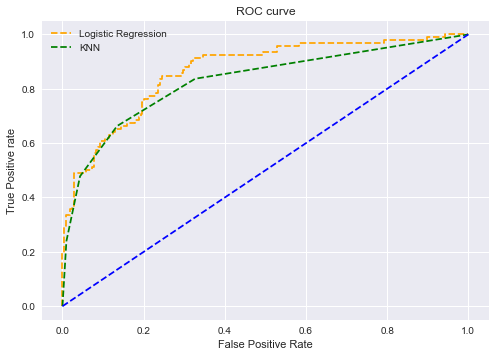

In [1031]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

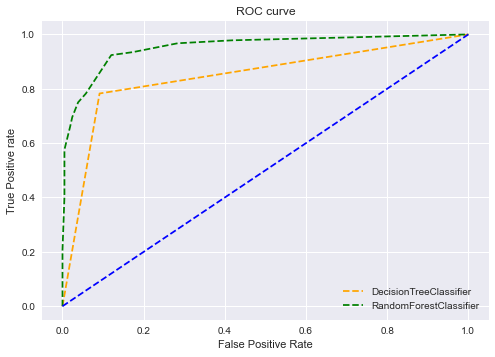

In [1032]:
model1 = DecisionTreeClassifier()
# knn
model2 = RandomForestClassifier(n_estimators=12,criterion='entropy',random_state=42)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

RANDOM FOREST CLASSIFIER DID A BETTER JOB OF CLASSIFYING POSITIVE CLASS IN THE DATASET.

PROCEEDING TO MODEL SAVING

In [1033]:
import pickle
filename2='power_plant(C).sav'
pickle.dump(rfc,open(filename2,'wb'))

LOADING THE MODEL AGAIN

In [1034]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.9950657894736842